In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/voicegender/voice.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix

import os
print(os.listdir("../input"))

['voicegender']


In [3]:
# read our data from dataset
data = pd.read_csv("/kaggle/input/voicegender/voice.csv")

In [4]:
#lets looking at top 5 datas
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [6]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [8]:
X = data.drop('label',axis=1)

In [9]:
X.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [10]:
data.label = [1 if each == "female" else 0 for each in data.label]
#we asssign 1 to female,0 to male

In [11]:
# we should have x and y values for test-train data
y = data.label.values
x_data = data.drop(["label"],axis=1)

In [12]:
x = (x_data - np.min(x_data)) / (np.max(x_data))
x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.000046,0.000049,0.000024,0.000012,0.000069,0.000057,0.009822,0.209530,0.000682,0.000376,0.000000,0.000046,0.000064,0.000012,0.000211,0.000006,0.000006,0.000006,0.000000,0.000000
1,0.000050,0.000051,0.000031,0.000015,0.000071,0.000056,0.017122,0.484581,0.000681,0.000392,0.000000,0.000050,0.000082,0.000012,0.000191,0.000007,0.000006,0.000042,0.000036,0.000040
2,0.000059,0.000064,0.000028,0.000007,0.000101,0.000094,0.023486,0.782619,0.000646,0.000366,0.000000,0.000059,0.000075,0.000012,0.000207,0.000006,0.000006,0.000012,0.000006,0.000036
3,0.000115,0.000055,0.000121,0.000074,0.000159,0.000085,0.000941,0.003190,0.000736,0.000555,0.000064,0.000115,0.000068,0.000014,0.000191,0.000154,0.000006,0.000430,0.000424,0.000189
4,0.000103,0.000060,0.000095,0.000060,0.000157,0.000097,0.000841,0.003309,0.000742,0.000598,0.000080,0.000103,0.000081,0.000013,0.000204,0.000544,0.000006,0.004188,0.004182,0.000159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.000101,0.000065,0.000117,0.000038,0.000154,0.000116,0.001346,0.005063,0.000735,0.000583,0.000153,0.000101,0.000140,0.000064,0.000200,0.000636,0.000006,0.003215,0.003209,0.000124
3164,0.000089,0.000068,0.000059,0.000033,0.000156,0.000124,0.000530,0.001912,0.000734,0.000542,0.000010,0.000089,0.000144,0.000026,0.000211,0.000695,0.000030,0.002810,0.002780,0.000212
3165,0.000108,0.000073,0.000140,0.000026,0.000171,0.000146,0.001433,0.005043,0.000723,0.000500,0.000006,0.000108,0.000160,0.000030,0.000211,0.000377,0.000006,0.002243,0.002237,0.000149
3166,0.000110,0.000069,0.000141,0.000033,0.000168,0.000135,0.001215,0.004114,0.000726,0.000516,0.000162,0.000110,0.000132,0.000026,0.000191,0.000604,0.000006,0.002744,0.002738,0.000237


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state = 42)

#test_size=0.2 means %20 testdatas,%80 train datas
method_names = []
method_scores = []
#these are for barplot in conclusion 

# Logistic regression classification

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Test Accuracy 0.8123028391167192


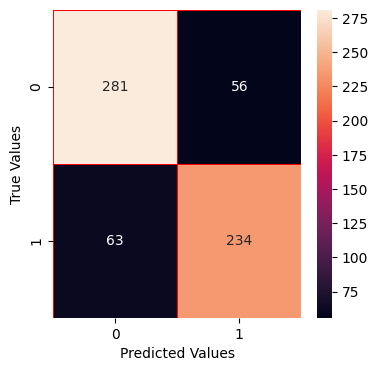

In [14]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)#fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))


method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#confision matrix
y_pred = log_reg.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# KNN(K-Nearest Neighbour)Classification

Score for number of Neighbors = 3; 0.7129337539432177


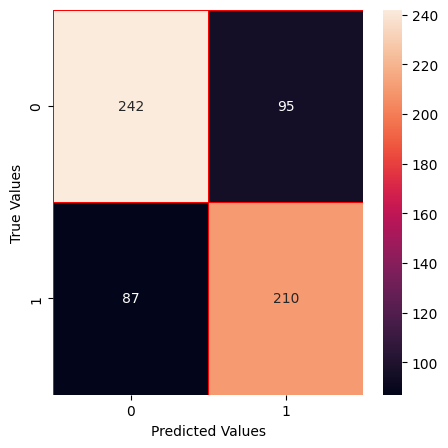

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors=3)


knn.fit(x_train, y_train)#fitting
print("Score for number of Neighbors = 3; {}".format(knn.score(x_test,y_test)))


method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#confision matrix
y_pred = knn.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Score for number of Neighbors = 6; 0.7208201892744479


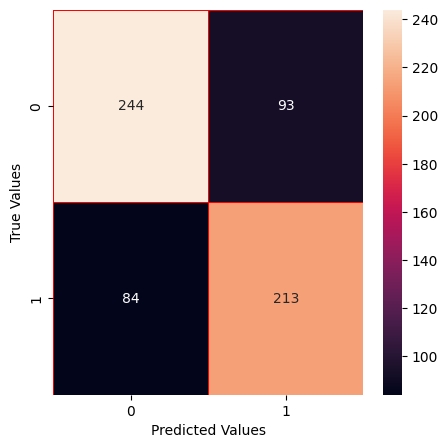

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6,weights ='distance',algorithm ='auto',metric = 'euclidean',leaf_size=30,p=2)

knn.fit(x_train, y_train)#fitting
print("Score for number of Neighbors = 6; {}".format(knn.score(x_test,y_test)))


method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#confision matrix
y_pred = knn.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# SVM(Support Vector Machine)

SVM Classification Score is: 0.6561514195583596


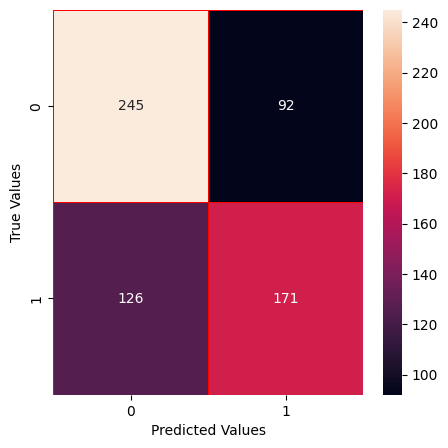

In [17]:
from sklearn.svm import SVC
svm = SVC(random_state=42)

svm.fit(x_train, y_train)#fitting
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))


method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#confision matrix
y_pred = svm.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


SVM Classification Score is: 0.6561514195583596


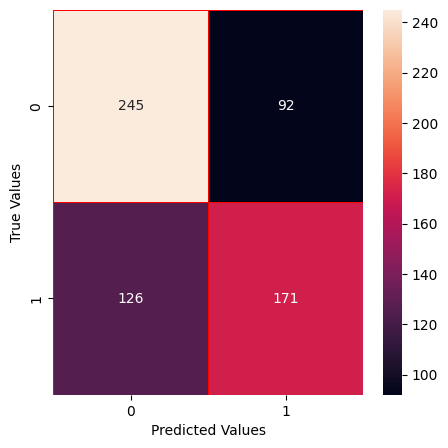

In [18]:
from sklearn.svm import SVC
svm = SVC(random_state=42,degree=3,gamma='scale',probability=False,shrinking=True,cache_size=200)

svm.fit(x_train, y_train)#fitting
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))


method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#confision matrix
y_pred = svm.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# Naive Bayes Classification

Naive Bayes Classification Score is: 0.9037854889589906


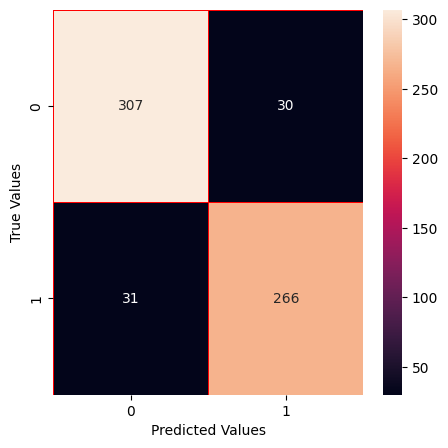

In [19]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

naive_bayes.fit(x_train, y_train)#fitting
print("Naive Bayes Classification Score is: {}".format(naive_bayes.score(x_test,y_test)))


method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#confision matrix
y_pred = naive_bayes.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Naive Bayes Classification Score is: 0.5


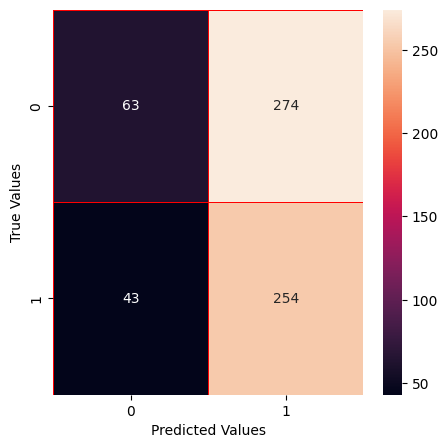

In [20]:
from sklearn.naive_bayes import MultinomialNB 
naive_bayes = MultinomialNB ()

naive_bayes.fit(x_train, y_train)#fitting
print("Naive Bayes Classification Score is: {}".format(naive_bayes.score(x_test,y_test)))


method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#confision matrix
y_pred = naive_bayes.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Naive Bayes Classification Score is: 0.5


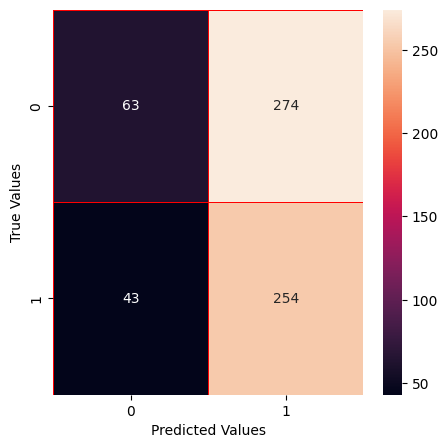

In [21]:
from sklearn.naive_bayes import ComplementNB 
naive_bayes = ComplementNB()

naive_bayes.fit(x_train, y_train)#fitting
print("Naive Bayes Classification Score is: {}".format(naive_bayes.score(x_test,y_test)))


method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#confision matrix
y_pred = naive_bayes.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Naive Bayes Classification Score is: 0.5031545741324921


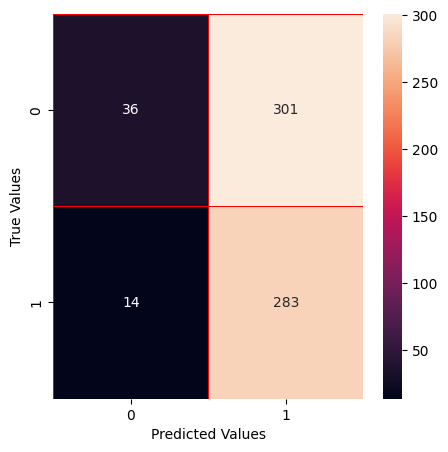

In [22]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()

naive_bayes.fit(x_train, y_train)#fitting
print("Naive Bayes Classification Score is: {}".format(naive_bayes.score(x_test,y_test)))


method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#confision matrix
y_pred = naive_bayes.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Naive Bayes Classification Score is: 0.6309148264984227


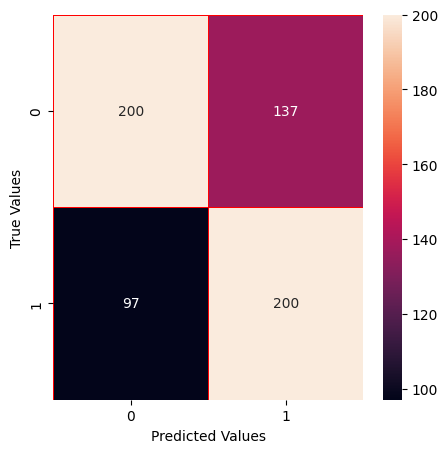

In [23]:
from sklearn.naive_bayes import CategoricalNB 
naive_bayes = CategoricalNB ()

naive_bayes.fit(x_train, y_train)#fitting
print("Naive Bayes Classification Score is: {}".format(naive_bayes.score(x_test,y_test)))


method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#confision matrix
y_pred = naive_bayes.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# Decision Tree Classification

Decision Tree Classification Score is: 0.9574132492113565


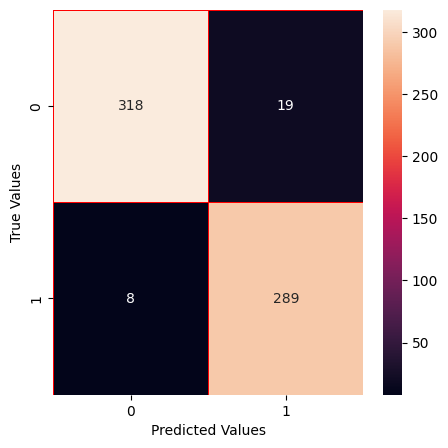

In [24]:
from sklearn.tree import DecisionTreeClassifier 
dec_tree = DecisionTreeClassifier() 

dec_tree.fit(x_train, y_train)#fitting
print("Decision Tree Classification Score is: {}".format(dec_tree.score(x_test,y_test)))


method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#confision matrix
y_pred = dec_tree.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Decision Tree Classification Score is: 0.9684542586750788


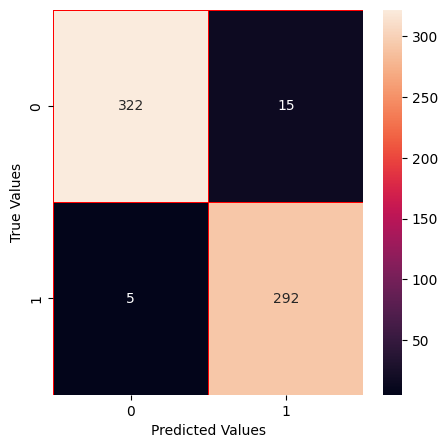

In [25]:
from sklearn.tree import DecisionTreeClassifier 
dec_tree = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=9,min_samples_split=8) 

dec_tree.fit(x_train, y_train)#fitting
print("Decision Tree Classification Score is: {}".format(dec_tree.score(x_test,y_test)))


method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#confision matrix
y_pred = dec_tree.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# Random Forest Classifier

Random Forest Classification Score is: 0.9842271293375394


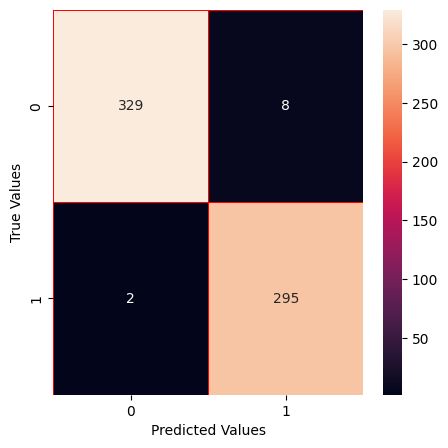

In [26]:
from sklearn.ensemble import RandomForestClassifier 
rand_forest = RandomForestClassifier(n_estimators=100,random_state=42)

rand_forest.fit(x_train, y_train)#fitting
print("Random Forest Classification Score is: {}".format(rand_forest.score(x_test,y_test)))


method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

#confision matrix
y_pred = rand_forest.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Random Forest Classification Score is: 0.9858044164037855


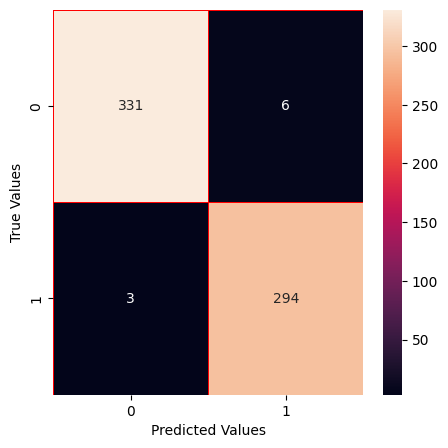

In [27]:
from sklearn.ensemble import RandomForestClassifier 
rand_forest = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=12,min_samples_split=2,criterion='gini', min_samples_leaf=1, verbose=0)

rand_forest.fit(x_train, y_train)#fitting
print("Random Forest Classification Score is: {}".format(rand_forest.score(x_test,y_test)))


method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

#confision matrix
y_pred = rand_forest.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# Gradient Boosting Classification

Gradient Forest Classification Score is: 0.9794952681388013


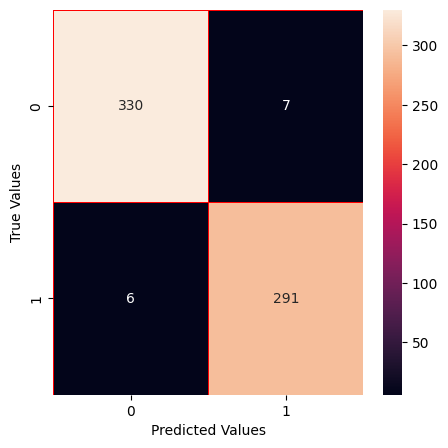

In [28]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier (n_estimators=100,learning_rate=0.05)

gbc.fit(x_train, y_train)#fitting
print("Gradient Forest Classification Score is: {}".format(gbc.score(x_test,y_test)))


method_names.append("Gradient Forest")
method_scores.append(gbc.score(x_test,y_test))

#confision matrix
y_pred = gbc.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Gradient Forest Classification Score is: 0.9810725552050473


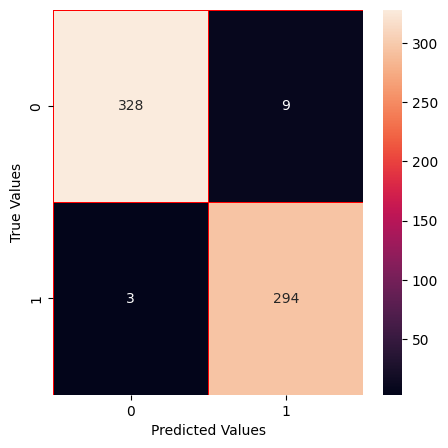

In [29]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier (n_estimators=100,learning_rate=0.1, min_samples_split=2,max_depth=3, subsample=1.0)

gbc.fit(x_train, y_train)#fitting
print("Gradient Forest Classification Score is: {}".format(gbc.score(x_test,y_test)))


method_names.append("Gradient Forest")
method_scores.append(gbc.score(x_test,y_test))

#confision matrix
y_pred = gbc.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Train Scores: 0.9790835040192165
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Test Scores: 0.9794952681388013
Gradient Forest CV Classification Score: 0.9794952681388013


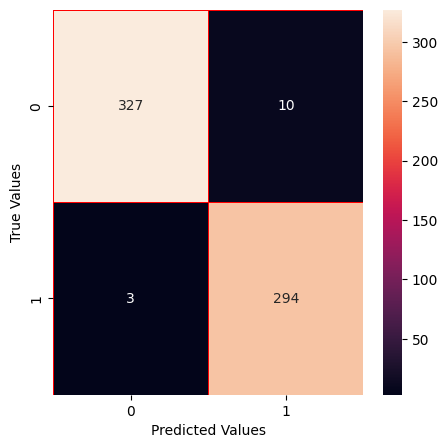

In [30]:
from sklearn.model_selection import GridSearchCV
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb,grid,cv = 4)
gb_cv.fit(x_train, y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Scores:",gb_cv.best_score_)
print("Best Parameters:",gb_cv.best_params_)
print("Test Scores:",gb_cv.score(x_test,y_test))
print("Gradient Forest CV Classification Score:",gb_cv.score(x_test,y_test))
method_names.append("Gradient Forest CV")
method_scores.append(gb_cv.score(x_test,y_test))

#Confusion matrix
y_pred = gb_cv.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# Ada Boost Classifier

Ada Boost Classifier : {'learning_rate': 0.1, 'n_estimators': 300}
Train Scores: 0.9790835040192165
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Test Scores: 0.9794952681388013
Gradient Forest CV Classification Score: 0.9794952681388013


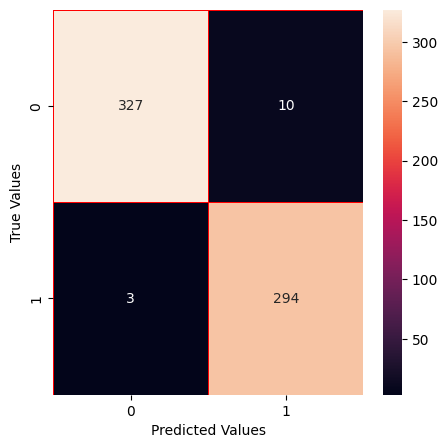

In [31]:
from sklearn.ensemble import AdaBoostClassifier
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}
ad =  AdaBoostClassifier()
ad_cv = GridSearchCV(gb,grid,cv = 4)
ad_cv.fit(x_train, y_train)
print("Ada Boost Classifier :",gb_cv.best_params_)
print("Train Scores:",ad_cv.best_score_)
print("Best Parameters:",ad_cv.best_params_)
print("Test Scores:",ad_cv.score(x_test,y_test))
print("Gradient Forest CV Classification Score:",ad_cv.score(x_test,y_test))
method_names.append("Ada Boost Classifier")
method_scores.append(ad_cv.score(x_test,y_test))

#Confusion matrix
y_pred = ad_cv.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#visualization confusion matrix
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()
